In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv('csv/prelim_datasets/gameandgrade.csv')

df.head()

,Sex,School Code,Playing Years,Playing Often,Playing Hours,Playing Games,Parent Revenue,Father Education,Mother Education,Grade
0,0,1,1,2,1,1,4,4,5,77.50
1,1,1,1,3,1,1,1,3,3,83.00
2,0,1,0,0,0,0,1,3,3,80.00
3,0,1,3,5,1,1,2,2,3,45.00
4,1,1,1,1,2,1,1,3,4,85.00


In [3]:
# Check for missing values
print(df.isnull().sum())

# Drop or fill missing values
df = df.dropna()  # Drops rows with missing values

Sex                 0
School Code         0
Playing Years       0
Playing Often       0
Playing Hours       0
Playing Games       0
Parent Revenue      0
Father Education    0
Mother Education    0
Grade               0
dtype: int64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Sex               770 non-null    int64 
 1   School Code       770 non-null    int64 
 2   Playing Years     770 non-null    int64 
 3   Playing Often     770 non-null    int64 
 4   Playing Hours     770 non-null    int64 
 5   Playing Games     770 non-null    int64 
 6   Parent Revenue    770 non-null    int64 
 7   Father Education  770 non-null    int64 
 8   Mother Education  770 non-null    int64 
 9   Grade             770 non-null    object
dtypes: int64(9), object(1)
memory usage: 60.3+ KB


In [5]:
# Convert the target variable (if it's categorical)
df['Grade'] = pd.to_numeric(df['Grade'], errors='coerce')
df = df.dropna()  # Drop rows where conversion fails

In [6]:
# Create interaction terms
df['PlayingYears_PlayingOften'] = df['Playing Years'] * df['Playing Often']
df['PlayingHours_ParentRevenue'] = df['Playing Hours'] * df['Parent Revenue']
df['Father_Mother_Education'] = df['Father Education'] * df['Mother Education']

In [7]:
# Convert categorical variables into dummy variables
df = pd.get_dummies(df, columns=['Sex', 'School Code'], drop_first=True)

In [8]:
# Define predictors (X) and target (y)
X = df.drop(columns=['Grade'])  # Drop the target variable
y = df['Grade']  # Define the target variable

In [9]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
# Make predictions
y_pred = model.predict(X_test)

In [12]:
# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 10.694100446481583
Mean Squared Error (MSE): 174.28536318050587
R² Score: 0.4155520926801505


C:\Users\Faith Nina Marie\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Faith Nina Marie\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Faith Nina Marie\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Faith Nina Marie\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498:

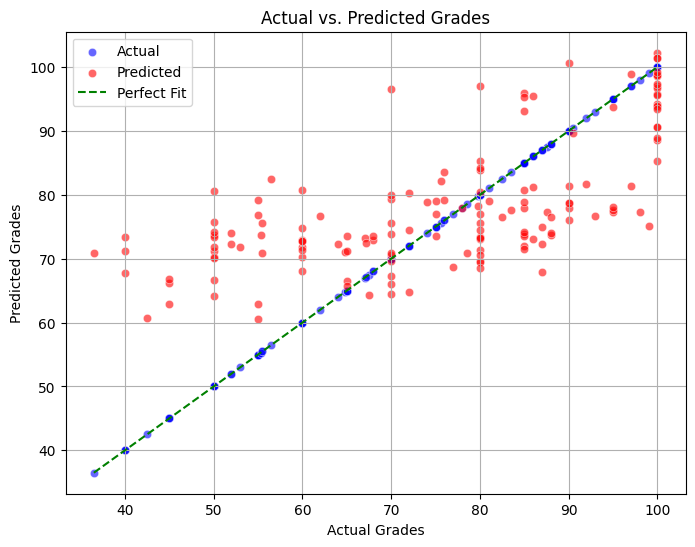

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert y_test and y_pred to flattened arrays (if needed)
y_test_flat = y_test.values.flatten()  
y_pred_flat = y_pred.flatten()

# Create scatter plot: Actual vs Predicted
plt.figure(figsize=(8, 6))

sns.scatterplot(x=y_test_flat, y=y_test_flat, color="blue", label="Actual", alpha=0.6)  
sns.scatterplot(x=y_test_flat, y=y_pred_flat, color="red", label="Predicted", alpha=0.6)

# Perfect fit line (y = x)
plt.plot([y_test_flat.min(), y_test_flat.max()], [y_test_flat.min(), y_test_flat.max()], color="green", linestyle="--", label="Perfect Fit")

# Labels and title
plt.xlabel("Actual Grades")
plt.ylabel("Predicted Grades")
plt.title("Actual vs. Predicted Grades")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Conlusion: The Multiple Linear Regression model performed significantly better than Single Linear Regression.
# The result suggests that gaming alone does not have a strong correlation with grades 
# Academic performance is affected by a mix of personal, school, and family-related factors.
# Other unexplored factors such as study habits and sleep quality may also play a crucial role in academic performance.